In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%precision 3

data = pd.read_csv('example_cancer.csv',encoding='cp949') #'cp949' 한글 인코딩
data

,age,sex,height,weight,dateOfoperation,cancerStaging,hospitalization,diseaseCode
0,75,남,161.0,64.0,2011-06-22,I,48,C187
1,52,여,176.6,75.3,2011-05-19,IV,17,C187
2,67,여,154.0,65.6,2011-05-31,III,10,C187
3,62,남,162.0,57.0,2011-06-21,I,11,C187
4,70,남,171.0,65.0,2011-06-09,II,10,C182
...,...,...,...,...,...,...,...,...
18305,51,여,155.0,47.0,2011-03-03,III,29,C185
18306,55,남,171.0,75.0,2011-04-21,IV,19,C19
18307,54,남,165.0,66.5,2011-04-29,I,37,C189
18308,61,남,159.0,59.0,2011-02-16,II,22,C189


# 1. 비만일수록 암에 걸릴 확률이 높을까?

In [2]:
#바로 사용할 수 있는 데이터로 변환
#엑셀파일에서 숫자가 아닌 부분은 NaN으로 변경
data=data.dropna()

#BMI 열 추가 = kg/m^2
height_m=data['height']/100 
data['BMI']=data['weight']/(height_m*height_m)
data.head()

C:\Users\LG\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,age,sex,height,weight,dateOfoperation,cancerStaging,hospitalization,diseaseCode,BMI
0,75,남,161.0,64.0,2011-06-22,I,48,C187,24.690405
1,52,여,176.6,75.3,2011-05-19,IV,17,C187,24.144242
2,67,여,154.0,65.6,2011-05-31,III,10,C187,27.660651
3,62,남,162.0,57.0,2011-06-21,I,11,C187,21.719250
4,70,남,171.0,65.0,2011-06-09,II,10,C182,22.229062


In [70]:
#BMI로 저체중, 정상, 비만 그룹 나누기
group_name = ['저체중','정상','비만']
group_bin = [0,18.5,25,50]
data_ob = pd.cut(data.BMI,group_bin,labels=group_name,right=False)
data['obesity']=data_ob
data.head(5)

C:\Users\LG\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,age,sex,height,weight,dateOfoperation,cancerStaging,hospitalization,diseaseCode,BMI,obesity
0,75,남,161.0,64.0,2011-06-22,I,48,C187,24.690405,정상
1,52,여,176.6,75.3,2011-05-19,IV,17,C187,24.144242,정상
2,67,여,154.0,65.6,2011-05-31,III,10,C187,27.660651,비만
3,62,남,162.0,57.0,2011-06-21,I,11,C187,21.719250,정상
4,70,남,171.0,65.0,2011-06-09,II,10,C182,22.229062,정상


In [71]:
#비만에 따른 환자 수
data.groupby('obesity').count()

,age,sex,height,weight,dateOfoperation,cancerStaging,hospitalization,diseaseCode,BMI
obesity,,,,,,,,,
저체중,976,976,976,976,976,976,976,976,976
정상,11470,11470,11470,11470,11470,11470,11470,11470,11470
비만,5431,5431,5431,5431,5431,5431,5431,5431,5431


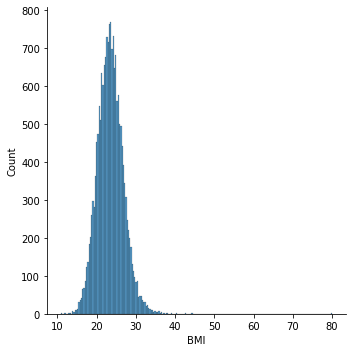

In [72]:
#BMI에 따른 환자 수
sns.displot(data['BMI'],kde=False)

### 저체중인 사람은 976명, 정상인 사람은 11470, 비만인 사람은 5431명으로 비만이라고 해서 대장암에 걸릴 확률이 높다고 말할 수는 없다.
### BMI로 히스토그램을 나타내보아도 평균수치라고 할 수 있는 18.5에서 25까지 인원수가 가장 많은 것을 알 수 있다.

# 1+. 그렇다면 비만일때 cancer staging과의 관계는?

In [73]:
#cancer staging에 따른 BMI 평균
data.groupby('cancerStaging').BMI.mean()

cancerStaging
I      24.030059
II     23.287365
III    23.491759
IV     22.990213
Name: BMI, dtype: float64

### 암단계에 따른 BMI 평균이 다 정상영역에 있는 것으로 보아 특별한 관계는 없는 것으로 볼 수 있다.

# 2. 나이가 많을수록 암에 걸릴 확률이 높을까?

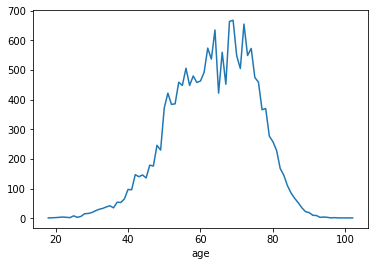

In [74]:
#나이별 환자수 분포
data_m=data.groupby('age').count()
data_m['sex'].plot()

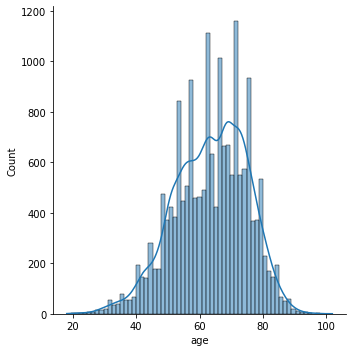

In [92]:
sns.displot(data.age,kde=True)

### 위 그래프를 보면 50~70대가 가장 많이 걸렸다고 생각할 수 있다. 하지만 이 그래프는 딱 환자의 수만 측정한 것이기 때문에 단순히 나이가 어린 환자와 늙은 환자가 적은 것일수도 있다. 

In [88]:
#나이대 열 생성
group_bin1=[10,20,30,40,50,60,70,80,90,100,200]
group_name1=['10대','20대','30대','40대','50대','60대','70대','80대','90대','100이상']
data_age=pd.cut(data.age,group_bin1, right=False, labels=group_name1)
data['age_group']=data_age
data

C:\Users\LG\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,age,sex,height,weight,dateOfoperation,cancerStaging,hospitalization,diseaseCode,BMI,obesity,age_group
0,75,남,161.0,64.0,2011-06-22,I,48,C187,24.690405,정상,70대
1,52,여,176.6,75.3,2011-05-19,IV,17,C187,24.144242,정상,50대
2,67,여,154.0,65.6,2011-05-31,III,10,C187,27.660651,비만,60대
3,62,남,162.0,57.0,2011-06-21,I,11,C187,21.719250,정상,60대
4,70,남,171.0,65.0,2011-06-09,II,10,C182,22.229062,정상,70대
...,...,...,...,...,...,...,...,...,...,...,...
18305,51,여,155.0,47.0,2011-03-03,III,29,C185,19.562955,정상,50대
18306,55,남,171.0,75.0,2011-04-21,IV,19,C19,25.648918,비만,50대
18307,54,남,165.0,66.5,2011-04-29,I,37,C189,24.426079,정상,50대
18308,61,남,159.0,59.0,2011-02-16,II,22,C189,23.337684,정상,60대


In [76]:
#나이대별 환자 수 비율
data_age=data.groupby('age_group').age.count()
data_age/data['age'].count()

age_group
10대      0.000056
20대      0.003300
30대      0.022038
40대      0.089104
50대      0.244043
60대      0.305795
70대      0.267200
80대      0.065499
90대      0.002909
100이상    0.000056
Name: age, dtype: float64

### 나이대별 비율을 보면 50대에서 70대가 확실히 많은 것을 알 수 있으며, 10대와 100세 이상인 환자의 비율은 0.0056%로 매우 낮은 것을 알 수 있다.따라서 위에서 나타낸 그래프만 보고는 나이와 암의 상관관계를 비교할 수 없다.

# 2+. 그렇다면 나이에 따른 cancerStaging과의 관계는?

In [100]:
data.groupby('cancerStaging').age.mean()

cancerStaging
I      63.463252
II     63.742272
III    63.452341
IV     63.064772
Name: age, dtype: float64

### 각 단계별 평균 연령이 63세로 비슷한 것으로 보아 암의 진행단계와 나이는 별 관계가 없다고 볼 수 있다.

# 3. 대장암은 여자가 많이 걸릴까? 남자가 많이 걸릴까?

In [124]:
#성별에 따른 환자 수
data.groupby('sex').sex.count()

sex
남    10846
여     7032
Name: sex, dtype: int64

### 남자는 10845명, 여자는 7032명으로 남자가 더 많이 걸렸다고 할 수 있다. 하지만 성별에 따라서는 확연한 차이가 나지 않는 것으로 보아 성별이 영향을 미친다고는 할 수 없다.

# 3+. 1번질문과 3번질문 비교

In [86]:
crosstab=pd.crosstab(data.sex,data.obesity)
crosstab

obesity,저체중,정상,비만
sex,,,
남,601,6956,3288
여,375,4514,2143


In [87]:
stats.chi2_contingency(crosstab)

(0.37753278745501284,
 0.8279799054036793,
 2,
 array([[ 592.086, 6958.223, 3294.691],
        [ 383.914, 4511.777, 2136.309]]))

### 카이제곱검정을 이용하여 BMI와 성별 간에 차이를 알아보았다. p값을 계산해보아도 0.05보다 큰 값인 0.83이 나온 것으로 보아 이 두 관계에는 유의한 의미가 없다는 것을 알 수 있으며, 위에서 밝혔듯이 BMI와 암이 특별한 관계가 없었기에 성별도 암과 특별한 관련이 없다는 것을 알 수 있다.